In [1]:
# Makes the display take up more of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
# Export
import numpy as np

In [3]:
# Export
class ReplayBuffer(object):
    def __init__(self, max_size, input_shape, n_actions, algo='_', env_name='_'):
        self.memory_size = max_size
        self.name=env_name+'_'+algo
        self.memory_counter = 0
        self.state_memory = np.zeros((self.memory_size, *input_shape),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.memory_size, *input_shape),
                                         dtype=np.float32)

        self.action_memory = np.zeros(self.memory_size, dtype=np.int64)
        self.reward_memory = np.zeros(self.memory_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.memory_size, dtype=bool)

    def store_transition(self, state, action, reward, state_next, done):
        index = self.memory_counter % self.memory_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_next
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = done
        self.memory_counter += 1

    def sample_buffer(self, batch_size):
        max_memory = min(self.memory_counter, self.memory_size)
        batch = np.random.choice(max_memory, batch_size, replace=False)

        states = self.state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_next = self.new_state_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_next, terminal
    
    def save_memory_buffer(self): # this is ~5GB
        np.save(f'data/{self.name}_state', self.state_memory)
        np.save(f'data/{self.name}_next_state', self.new_state_memory)
        np.save(f'data/{self.name}_action', self.action_memory)
        np.save(f'data/{self.name}_reward', self.reward_memory)
        np.save(f'data/{self.name}_done', self.terminal_memory)
        np.save(f'data/{self.name}_memory_counter', [self.memory_counter])
        
    def load_memory_buffer(self, filename):        
        self.state_memory = np.load(f'data/{filename}_state.npy')
        self.new_state_memory = np.load(f'data/{filename}_next_state.npy')
        self.action_memory = np.load(f'data/{filename}_action.npy')
        self.reward_memory = np.load(f'data/{filename}_reward.npy')
        self.terminal_memory = np.load(f'data/{filename}_done.npy')
        self.memory_counter = np.load(f'data/{filename}_memory_counter.npy')[0]

In [4]:
sz=(224,224)
memory = ReplayBuffer(max_size=200, input_shape=((5,)+sz), n_actions=7, algo='TestData', env_name='ReplayBuffer')

In [5]:
# Make Fake Data
state = np.random.random_sample((5,)+sz)
p = 0.1
for i in range(301):
    next_state = np.random.random_sample((5,)+sz)
    action = np.random.randint(0, high=7, size=1, dtype=int)[0]
    reward = np.random.normal(-30430.12, 23254.63805, 1)[0]
    done = np.random.choice(a=[False, True], size=1, p=[p, 1-p])[0]
    memory.store_transition(state, action, reward, next_state, done)
    
    state = next_state

In [6]:
memory.memory_counter,memory.memory_counter % memory.memory_size, memory.name

(301, 101, 'ReplayBuffer_TestData')

In [7]:
memory.state_memory.shape

(200, 5, 224, 224)

In [8]:
memory.sample_buffer(32)

(array([[[[3.14215571e-01, 8.51944804e-01, 1.76986575e-01, ...,
           9.89303112e-01, 1.42743345e-02, 7.72971064e-02],
          [3.85963202e-01, 1.55199334e-01, 2.87629992e-01, ...,
           9.10992622e-01, 4.12548512e-01, 1.96230739e-01],
          [8.72865021e-01, 1.55436009e-01, 9.77126658e-02, ...,
           4.10507500e-01, 3.31334233e-01, 2.02319801e-01],
          ...,
          [9.00824726e-01, 7.97252357e-01, 5.65806091e-01, ...,
           4.92106676e-01, 3.58660430e-01, 7.32043147e-01],
          [8.97699594e-01, 9.81096089e-01, 2.34141007e-01, ...,
           1.64203912e-01, 3.64169568e-01, 8.16648722e-01],
          [2.74505109e-01, 3.70040387e-02, 2.35768482e-01, ...,
           3.98090124e-01, 5.28047621e-01, 7.91406214e-01]],
 
         [[8.39260578e-01, 9.74955201e-01, 1.58723086e-01, ...,
           7.55712032e-01, 3.44857946e-02, 8.50030407e-02],
          [5.76247036e-01, 8.26012135e-01, 4.64242429e-01, ...,
           3.16884100e-01, 1.74786061e-01, 2.03459

In [18]:
#memory.save_memory_buffer()

In [13]:
memory.load_memory_buffer('Neighborhood_600s_DDQNAgent_2022-03-22')

In [14]:
memory.memory_counter, memory.memory_counter % memory.memory_size, memory.name

(6895, 95, 'ReplayBuffer_TestData')

In [15]:
memory.memory_counter

6895

In [16]:
memory.state_memory.shape

(2500, 4, 224, 224)

In [17]:
states, actions, rewards, states_next, terminal=memory.sample_buffer(32)

In [18]:
i=31
state=states[i]
next_state = states_next[i]
actions[i], terminal[i]

(6, False)

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

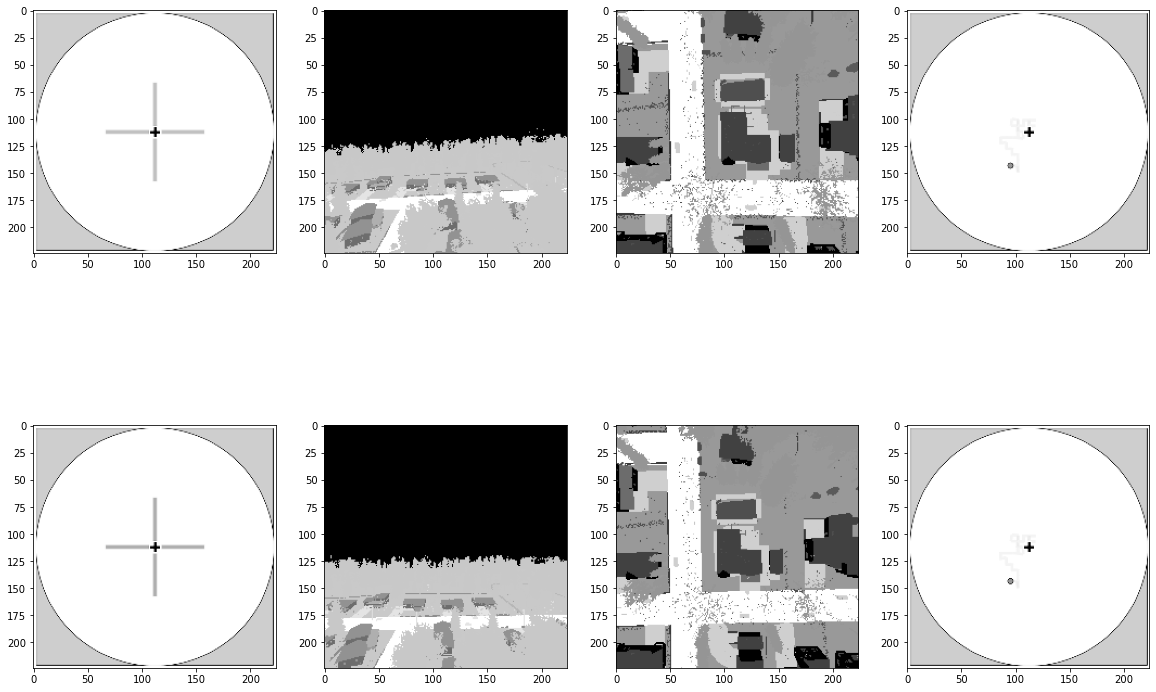

In [20]:
n_col=4
fig, ax = plt.subplots(2, n_col, figsize=(20,14))
for c in range(n_col):
    ax[0,c].imshow(state[c]*0.5+0.5, cmap='Greys_r')
    ax[1,c].imshow(next_state[c]*0.5+0.5, cmap='Greys_r')


plt.show()

In [20]:
state[0].shape

(224, 224)

In [30]:
dist=3
if dist<5: print(1)

1


In [27]:
end=dt.datetime.now()
n_steps=1; score=0.22
print(f'Total Steps: {n_steps}, Time {61/60:0.1f}(min) Score {score:0.1f} {end.strftime("%A %B %d, %Y")} at {end.strftime("%H:%M")}')

Total Steps: 1, Time 1.0(min) Score 0.2 Wednesday March 23, 2022 at 15:34


In [1]:
!python notebook2script.py ReplayBuffer.ipynb

Converted ReplayBuffer.ipynb to nb_files/nb_ReplayBuffer.py


In [24]:
import datetime as dt
end=dt.datetime.now()
print(f'Finished: {end.strftime("%A %B %d, %Y")} at {end.strftime("%H:%M")}')

Finished: Wednesday March 23, 2022 at 15:33
